# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [93]:
from xmlrpc.client import APPLICATION_ERROR

from IPython.core.display import display_png
from pandas import read_parquet
from statsmodels.regression.rolling import RollingOLS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import yfinance as yf


import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import requests

In [94]:
apple=yf.download("AAPL", start='2015-01-01', end='2025-12-08')

[*********************100%***********************]  1 of 1 completed


In [95]:
ticker=['AAPL','MSFT','SPY']
df=yf.download(ticker, start='2015-01-01', end='2025-12-08')
df

[*********************100%***********************]  3 of 3 completed


Price            Close                                High              \
Ticker            AAPL        MSFT         SPY        AAPL        MSFT   
Date                                                                     
2015-01-02   24.237555   39.858456  171.093643   24.705324   40.421043   
2015-01-05   23.554741   39.491920  168.003799   24.086801   39.832880   
2015-01-06   23.556957   38.912296  166.421371   23.816336   39.849941   
2015-01-07   23.887274   39.406685  168.495224   23.987034   39.602738   
2015-01-08   24.805079   40.565952  171.485107   24.862719   40.702337   
...                ...         ...         ...         ...         ...   
2025-12-01  283.100006  486.739990  680.270020  283.420013  489.859985   
2025-12-02  286.190002  490.000000  681.530029  287.399994  493.500000   
2025-12-03  284.149994  477.730011  683.890015  288.619995  484.239990   
2025-12-04  280.700012  480.839996  684.390015  284.730011  481.320007   
2025-12-05  278.779999  483.160004  685.690002  281.140015  483.399994   

Price                          Low                                Open  \
Ticker             SPY        AAPL        MSFT         SPY        AAPL   
Date                                                                     
2015-01-02  172.301295   23.798604   39.670929  170.052573   24.694239   
2015-01-05  170.210864   23.368521   39.423727  167.695647   24.006992   
2015-01-06  168.836650   23.195599   38.818531  165.621824   23.619031   
2015-01-07  168.836698   23.654497   38.775907  167.304245   23.765343   
2015-01-08  171.701658   24.097882   39.824361  169.894362   24.215380   
...                ...         ...         ...         ...         ...   
2025-12-01  682.989990  276.140015  484.649994  678.739990  278.010010   
2025-12-02  683.820007  282.630005  486.320007  679.330017  283.000000   
2025-12-03  684.909973  283.299988  475.200012  679.690002  286.200012   
2025-12-04  685.369995  278.589996  476.489990  681.340027  284.100006   
2025-12-05  688.390015  278.049988  478.880005  684.580017  280.540009   

Price                                  Volume                       
Ticker            MSFT         SPY       AAPL      MSFT        SPY  
Date                                                                
2015-01-02   39.773216  171.884867  212818400  27913900  121465900  
2015-01-05   39.526014  170.044295  257142000  39673900  169632600  
2015-01-06   39.534552  168.311946  263188400  36447900  209151400  
2015-01-07   39.193584  167.753982  160423600  29114100  125346700  
2015-01-08   39.849932  169.911010  237458000  29645200  147217800  
...                ...         ...        ...       ...        ...  
2025-12-01  488.440002  678.809998   46587700  23964000   61201200  
2025-12-02  486.720001  681.919983   53669500  19562700   62953800  
2025-12-03  476.320007  680.570007   43538700  34615100   57238500  
2025-12-04  479.760010  685.299988   43989100  22318200   61970300  
2025-12-05  482.519989  685.469971   47265800  22608700   79241000  

[2749 rows x 15 columns]

In [96]:
df.to_csv('three_stock.csv')
df=pd.read_csv('three_stock.csv', header=[0,1], index_col=[0], parse_dates=[0])
#df.columns=pd.MultiIndex.from_tuples(df.columns)

In [97]:
close=df[('Close')]
norm_close=close.div(close.iloc[1,:]).mul(100)
norm_close


Ticker,AAPL,MSFT,SPY
Date,,,
2015-01-02,102.898837,100.928127,101.839151
2015-01-05,100.000000,100.000000,100.000000
2015-01-06,100.009409,98.532297,99.058100
2015-01-07,101.411745,99.784170,100.292508
2015-01-08,105.308221,102.719624,102.072160
...,...,...,...
2025-12-01,1201.881215,1232.505243,404.913473
2025-12-02,1214.999577,1240.760120,405.663462
2025-12-03,1206.338864,1209.690502,407.068184


In [98]:
norm_close.columns

Index(['AAPL', 'MSFT', 'SPY'], dtype='object', name='Ticker')

In [99]:
aapl=norm_close['AAPL'].copy().to_frame()
aapl

,AAPL
Date,
2015-01-02,102.898837
2015-01-05,100.000000
2015-01-06,100.009409
2015-01-07,101.411745
2015-01-08,105.308221
...,...
2025-12-01,1201.881215
2025-12-02,1214.999577
2025-12-03,1206.338864


In [100]:
aapl['Lag']=aapl['AAPL'].shift(periods=1)
aapl['change_perc']=aapl['AAPL'].div(aapl['Lag'])

In [101]:
clean_delta=aapl['change_perc'].dropna().to_frame()

<Axes: ylabel='Frequency'>

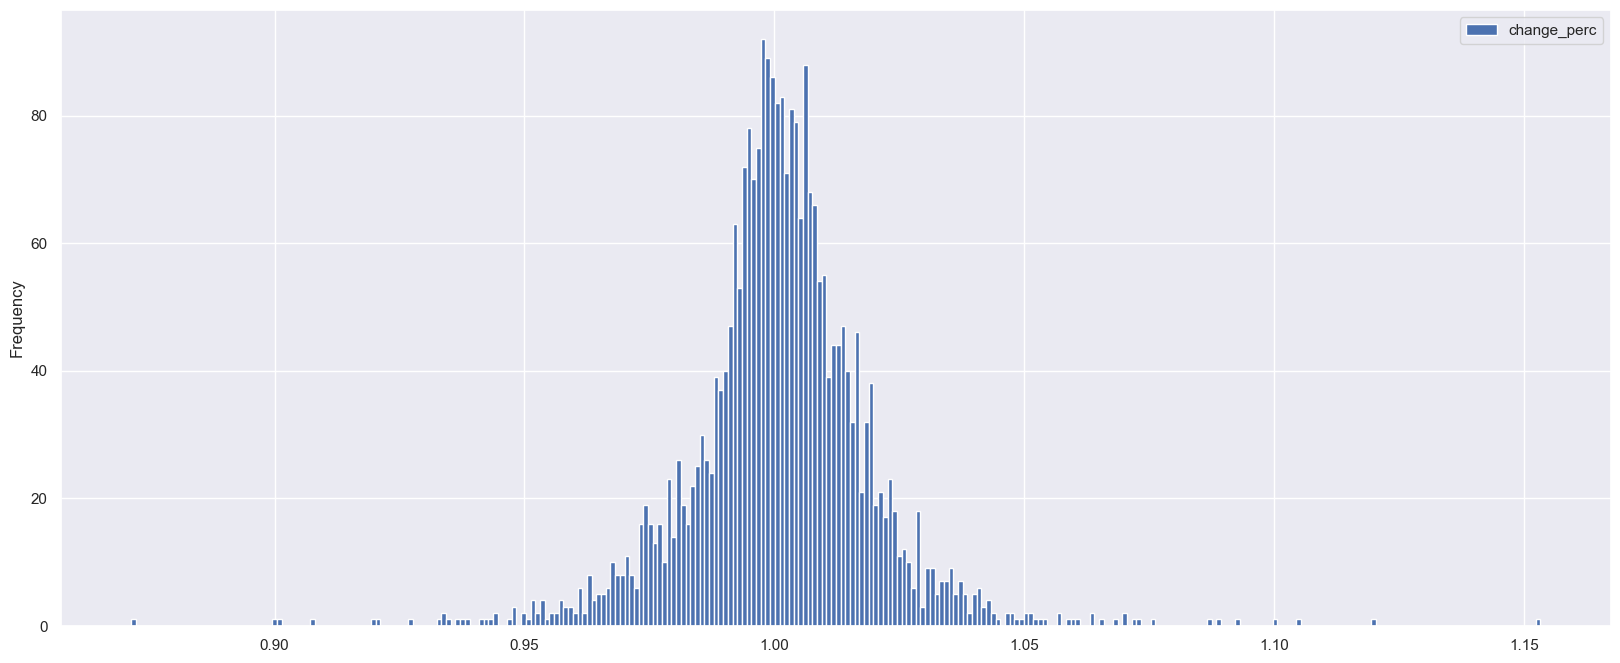

In [102]:
clean_delta.plot( kind='hist', figsize=(20,8), bins=300)

In [103]:
clean_delta

,change_perc
Date,
2015-01-05,0.971828
2015-01-06,1.000094
2015-01-07,1.014022
2015-01-08,1.038422
2015-01-09,1.001073
...,...
2025-12-01,1.015241
2025-12-02,1.010915
2025-12-03,0.992872


In [104]:
mean_daily=clean_delta.mean()
var_daily=clean_delta.var()
var_daily

change_perc    0.000332
dtype: float64

In [105]:
annual_return=np.exp(mean_daily*252)
annual_return

change_perc    3.611323e+109
dtype: float64

# SMALL FUCKING CHALLENGE

In [106]:
ticker_2=['AAPL','MSFT','SPY','KO','IBM','DIS','WLDS','AMZN','NVDA','TSLA','SONY','AVGO','JPM','BX']
stocks=yf.download(ticker_2, start='2015-01-01', end='2025-12-08')
stocks

[*********************100%***********************]  14 of 14 completed


Price            Close                                                  \
Ticker            AAPL        AMZN        AVGO          BX         DIS   
Date                                                                     
2015-01-02   24.237555   15.426000    7.574804   19.624437   85.943520   
2015-01-05   23.554741   15.109500    7.453716   19.336948   84.687599   
2015-01-06   23.556957   14.764500    7.284193   18.963202   84.238396   
2015-01-07   23.887274   14.921000    7.480962   19.233442   85.100128   
2015-01-08   24.805079   15.023000    7.854818   19.382946   85.980171   
...                ...         ...         ...         ...         ...   
2025-12-01  283.100006  233.880005  386.079987  146.350006  106.769997   
2025-12-02  286.190002  234.419998  381.570007  146.740005  104.830002   
2025-12-03  284.149994  232.380005  380.609985  151.520004  105.739998   
2025-12-04  280.700012  229.110001  381.029999  151.389999  105.470001   
2025-12-05  278.779999  229.529999  390.239990  152.149994  105.300003   

Price                                                                  ...  \
Ticker             IBM         JPM         KO        MSFT        NVDA  ...   
Date                                                                   ...   
2015-01-02   98.123055   46.720936  29.783407   39.858456    0.483011  ...   
2015-01-05   96.579094   45.270489  29.783407   39.491920    0.474853  ...   
2015-01-06   94.496231   44.096680  30.009575   38.912296    0.460457  ...   
2015-01-07   93.878670   44.163956  30.384165   39.406685    0.459257  ...   
2015-01-08   95.919106   45.150856  30.751675   40.565952    0.476533  ...   
...                ...         ...        ...         ...         ...  ...   
2025-12-01  305.670013  308.920013  71.949997  486.739990  179.909988  ...   
2025-12-02  301.779999  307.880005  70.669998  490.000000  181.449905  ...   
2025-12-03  302.619995  312.130005  70.809998  477.730011  179.580002  ...   
2025-12-04  307.989990  316.100006  70.449997  480.839996  183.380005  ...   
2025-12-05  307.940002  315.040009  70.000000  483.160004  182.410004  ...   

Price         Volume                                                    \
Ticker           DIS      IBM       JPM        KO      MSFT       NVDA   
Date                                                                     
2015-01-02   5865400  5779673  12600000   9921100  27913900  113680000   
2015-01-05   7789400  5104898  20100600  26292600  39673900  197952000   
2015-01-06   6793100  6429448  29074100  16897500  36447900  197764000   
2015-01-07   6589500  4918083  23843200  13412300  29114100  321808000   
2015-01-08   7579400  4431693  16971100  21743600  29645200  283780000   
...              ...      ...       ...       ...       ...        ...   
2025-12-01  12628900  3166600   7727300  14388100  23964000  188131000   
2025-12-02   8548200  4261100   7249000  19871300  19562700  182632200   
2025-12-03  10177800  3953400   8535300  17001700  34615100  165138000   
2025-12-04  11471400  2962500   9627800  17710000  22318200  167364900   
2025-12-05  10680100  2344700   6518900  13978200  22608700  143971100   

Price                                                
Ticker          SONY        SPY      TSLA      WLDS  
Date                                                 
2015-01-02   6149500  121465900  71466000       NaN  
2015-01-05   5415500  169632600  80527500       NaN  
2015-01-06  11045500  209151400  93928500       NaN  
2015-01-07  12431500  125346700  44526000       NaN  
2015-01-08   6482500  147217800  51637500       NaN  
...              ...        ...       ...       ...  
2025-12-01   5589800   61201200  57463600  114400.0  
2025-12-02   3187100   62953800  69336600  143700.0  
2025-12-03   3461300   57238500  87483000  366700.0  
2025-12-04   2812800   61970300  71906500  275300.0  
2025-12-05   3012600   79241000  56427500  262200.0  

[2749 rows x 70 columns]

In [107]:
close_data=stocks[('Close')]
growth_raw=close_data.pct_change().dropna()
growth_raw

Ticker,AAPL,AMZN,AVGO,BX,DIS,IBM,JPM,KO,MSFT,NVDA,SONY,SPY,TSLA,WLDS
Date,,,,,,,,,,,,,,
2022-09-14,0.009555,0.013641,0.014097,0.010491,0.006621,0.003458,-0.002320,0.005292,0.000913,-0.000228,0.000416,0.003816,0.035874,0.035088
2022-09-15,-0.018930,-0.017659,-0.020773,-0.006921,-0.015378,-0.017229,0.015071,-0.013588,-0.027119,-0.015158,-0.002499,-0.011353,0.003767,-0.077966
2022-09-16,-0.010960,-0.021777,0.004719,-0.026610,-0.022750,0.014184,-0.006703,0.000168,-0.002608,0.020806,0.000278,-0.007629,-0.001317,-0.139706
2022-09-19,0.025083,0.009148,-0.001314,0.032220,0.008499,0.003614,0.009225,0.007558,-0.000899,0.013942,0.008347,0.007755,0.018856,-0.226496
2022-09-20,0.015666,-0.019814,-0.017495,-0.044246,-0.014656,-0.011196,-0.019719,-0.001500,-0.008466,-0.015394,-0.018074,-0.011478,-0.001100,-0.049724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-01,0.015241,0.002830,-0.041890,-0.000478,0.022016,-0.009430,-0.013287,-0.009090,-0.010711,0.016497,-0.019421,-0.004565,-0.000070,-0.015544
2025-12-02,0.010915,0.002309,-0.011681,0.002665,-0.018170,-0.012726,-0.003367,-0.017790,0.006698,0.008559,-0.007297,0.001852,-0.002092,-0.010526
2025-12-03,-0.007128,-0.008702,-0.002516,0.032575,0.008681,0.002783,0.013804,0.001981,-0.025041,-0.010305,-0.003850,0.003463,0.040770,0.037234


In [108]:
summary=growth_raw.describe()


In [109]:
final=pd.DataFrame()
final['growth']=summary.iloc[1,:]*1000
final['risk']=summary.iloc[2,:]*1000
final

,growth,risk
Ticker,,
AAPL,0.901863,17.288955
AMZN,0.958577,21.361671
AVGO,3.017327,29.129996
BX,0.980438,23.205033
DIS,0.120010,18.590196
IBM,1.353853,15.139912
JPM,1.440502,14.841845
KO,0.354923,9.550085
MSFT,0.959623,15.796077


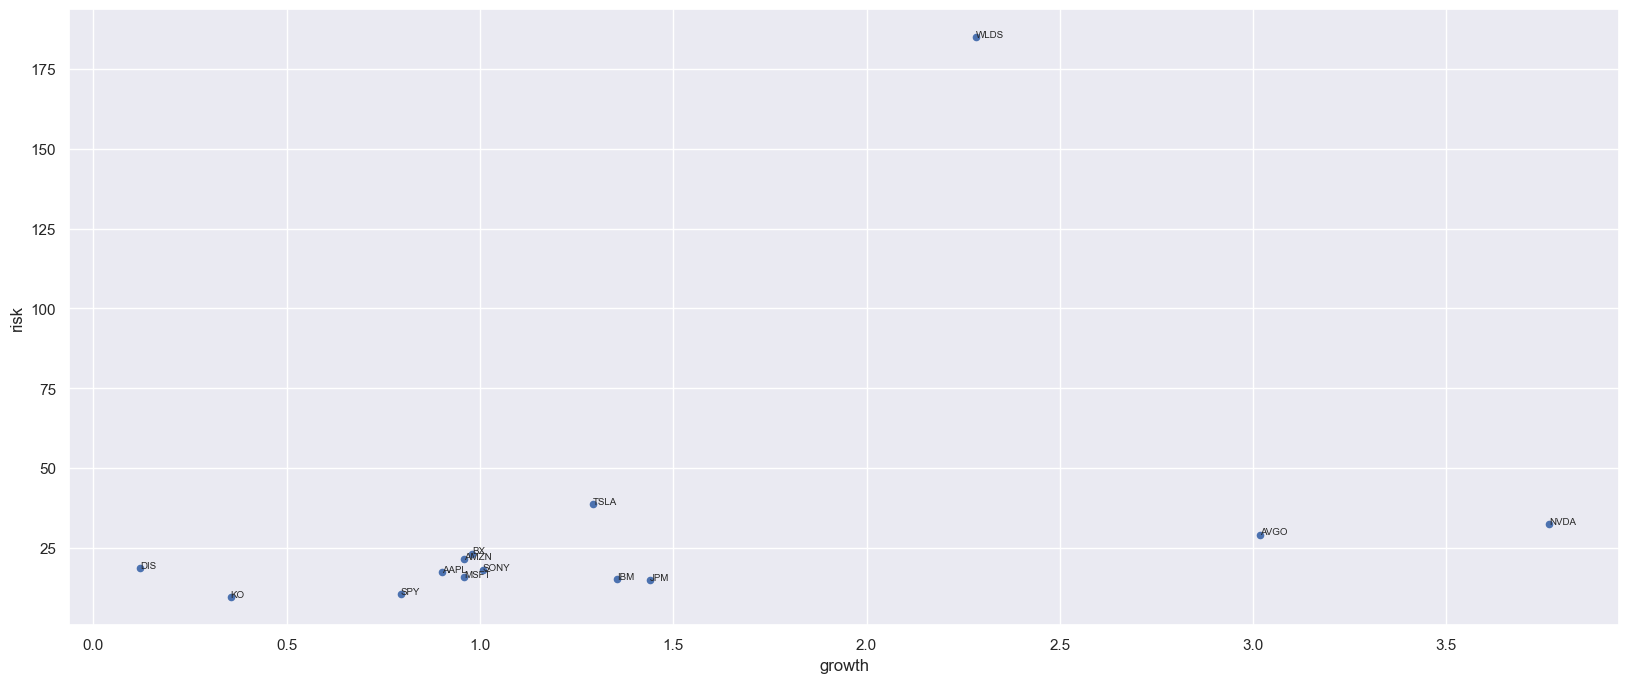

In [110]:
final.plot.scatter(x='growth',y='risk',figsize=(20,8))
for j in final.index:
    plt.annotate(j,xy=(final.loc[j,'growth'], final.loc[j,'risk']+0.002),size=7)

In [111]:
import seaborn as sns
growth_raw=growth_raw*100

<Axes: xlabel='Ticker', ylabel='Ticker'>

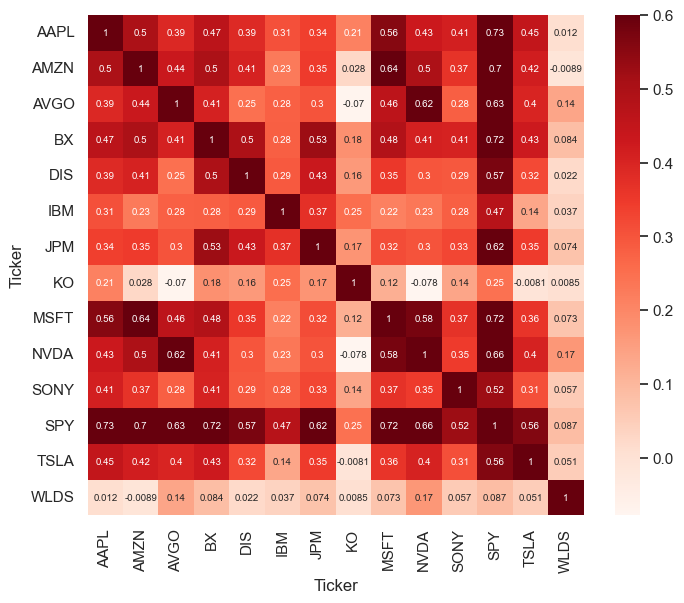

In [112]:
correlation=growth_raw.corr()
plt.figure(figsize=(8,6.5))
sns.set(font_scale=1)
sns.heatmap(correlation, annot=True,cmap='Reds',annot_kws={'size':7},vmax=0.6 )

## Moving Average

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

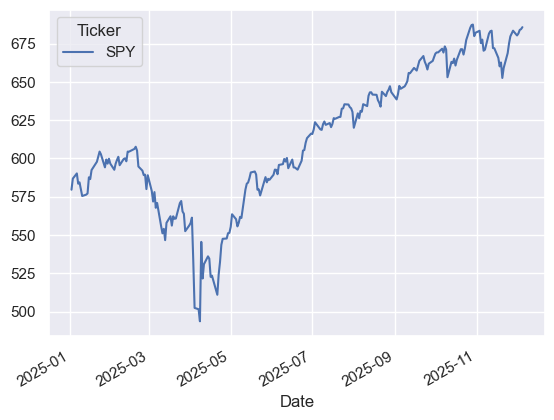

In [113]:
SPY=yf.download('SPY', start='2025-01-01', end='2025-12-8')
spy=SPY['Close']
spy.plot()

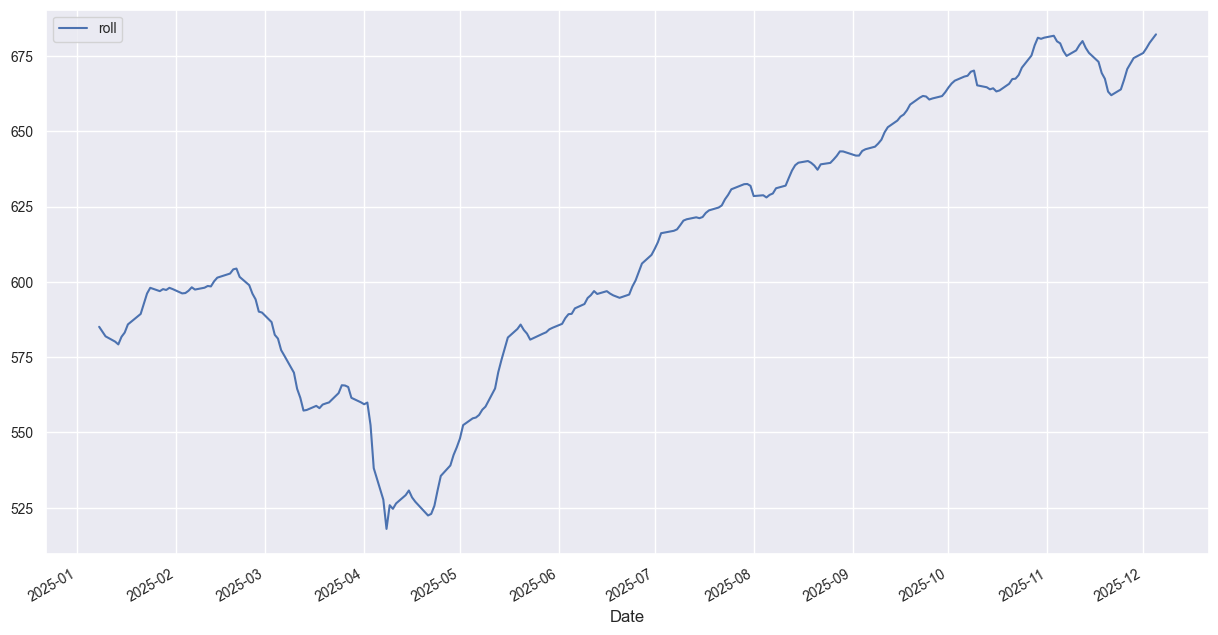

In [114]:
spy_roll=pd.DataFrame()
spy_roll=spy.ewm(span=6,min_periods=5).mean()
spy['roll']=spy_roll
#spy_roll.plot()
spy['roll'].plot(figsize=(15,8),fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [115]:
spy

Ticker,SPY,roll
Date,,
2025-01-02,579.561646,NaN
2025-01-03,586.808167,NaN
2025-01-06,590.188538,NaN
2025-01-07,583.516968,NaN
2025-01-08,584.369446,585.070424
...,...,...
2025-12-01,680.270020,676.018452
2025-12-02,681.530029,677.593188
2025-12-03,683.890015,679.392281


In [116]:
all_day=pd.date_range(start='2025-01-02',end='2025-12-05',freq='D')
spy['SPY'].reindex(all_day)
spy['SPY'].fillna(method='ffill' )
spy.head(20)

Ticker,SPY,roll
Date,,
2025-01-02,579.561646,NaN
2025-01-03,586.808167,NaN
2025-01-06,590.188538,NaN
2025-01-07,583.516968,NaN
2025-01-08,584.369446,585.070424
2025-01-10,575.447693,581.900008
2025-01-13,576.339905,580.144911
2025-01-14,577.132935,579.221796
2025-01-15,587.630981,581.746622


## Cumulative return

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Datetime'>

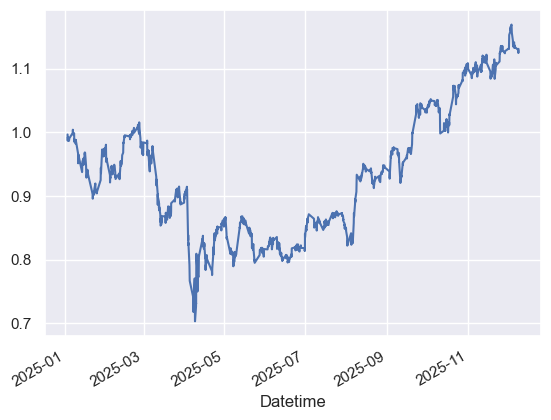

In [117]:
apple_original=yf.download('AAPL',interval='1h', start='2025-01-01', end='2025-12-09')
apple=apple_original['Close']
apple['Hourly_Return']=apple/(apple.shift(1))
apple['Cumm_Return']=apple['Hourly_Return'].cumprod()
#for n in range (0,1629):
#    for i in range (0,n):
#       apple.iloc[n,2]=apple.iloc[n,2]*(1+apple.iloc[i,1])
apple['Cumm_Return'].plot()

In [118]:
apple['Cumm_max']=apple['Cumm_Return'].cummax()
apple['drawdown']=-(apple['Cumm_Return']-apple['Cumm_max'])
apple['drawdown'].idxmax()
apple

Ticker,AAPL,Hourly_Return,Cumm_Return,Cumm_max,drawdown
Datetime,,,,,
2025-01-02 14:30:00+00:00,245.739899,NaN,NaN,NaN,NaN
2025-01-02 15:30:00+00:00,244.895004,0.996562,0.996562,0.996562,-0.000000
2025-01-02 16:30:00+00:00,243.428604,0.994012,0.990595,0.996562,0.005967
2025-01-02 17:30:00+00:00,242.686203,0.996950,0.987573,0.996562,0.008988
2025-01-02 18:30:00+00:00,242.488403,0.999185,0.986769,0.996562,0.009793
...,...,...,...,...,...
2025-12-08 16:30:00+00:00,277.230011,0.999171,1.128144,1.169287,0.041143
2025-12-08 17:30:00+00:00,276.970001,0.999062,1.127086,1.169287,0.042201
2025-12-08 18:30:00+00:00,276.359985,0.997798,1.124604,1.169287,0.044684


## Moving Average Strategy

In [119]:
import numpy as np
df=yf.download('AAPL',interval='1h',start='2025-01-01', end='2025-12-10')['Close']

[*********************100%***********************]  1 of 1 completed


Ticker
Strategy       1.114760
Return_perc    1.128144
dtype: float64

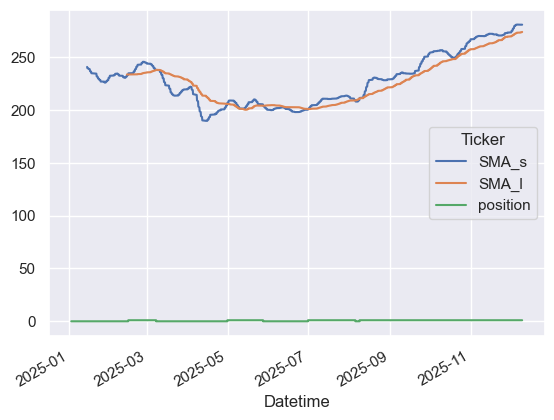

In [120]:
df['SMA_s']=df['AAPL'].rolling(50).mean()
df['SMA_l']=df['AAPL'].rolling(200).mean()
df['position']=np.where(df['SMA_s']>df['SMA_l'],1,0)

df['Return_perc']=np.log(df['AAPL']/df['AAPL'].shift(1))

df[['SMA_s','SMA_l','position']].plot()
df['Strategy']=df['Return_perc']*df['position']
df[['Strategy','Return_perc']].sum().apply(np.exp)
#df[['Strategy','Return_perc']].std()

In [124]:
def strategy(stock,start,end,sma_s,sma_l):
    df=yf.download(stock,start=start,end=end,interval='1h')['Close']
    df['SMA_s'] = df[stock].rolling(50).mean()
    df['SMA_l'] = df[stock].rolling(200).mean()
    df['position'] = np.where(df['SMA_s'] > (df['SMA_l']), 100, -100)
    df['Return_perc'] = np.log(df[stock] / df[stock].shift(1))/100
    df['Strategy'] = df['Return_perc'] * df['position']
    return_rst=df[['Strategy', 'Return_perc']].sum().apply(np.exp)
    df['Strategy']=df['Strategy']/100
    risk_rst=df[['Strategy','Return_perc']].std()*np.sqrt(252)
    df[['SMA_s','SMA_l','position',stock]].plot()
    display(df)
    display(return_rst)
    display(risk_rst)


[*********************100%***********************]  1 of 1 completed


Ticker,BX,SMA_s,SMA_l,position,Return_perc,Strategy
Datetime,,,,,,
2025-01-02 14:30:00+00:00,172.645004,NaN,NaN,-100,NaN,NaN
2025-01-02 15:30:00+00:00,173.800003,NaN,NaN,-100,6.667743e-05,-6.667743e-05
2025-01-02 16:30:00+00:00,172.759995,NaN,NaN,-100,-6.001914e-05,6.001914e-05
2025-01-02 17:30:00+00:00,171.755005,NaN,NaN,-100,-5.834245e-05,5.834245e-05
2025-01-02 18:30:00+00:00,172.970001,NaN,NaN,-100,7.049105e-05,-7.049105e-05
...,...,...,...,...,...,...
2025-12-09 16:30:00+00:00,156.274994,149.915845,145.057157,100,-7.039642e-07,-7.039642e-07
2025-12-09 17:30:00+00:00,156.710007,150.129387,145.081582,100,2.779770e-05,2.779770e-05
2025-12-09 18:30:00+00:00,156.710007,150.364587,145.105832,100,0.000000e+00,0.000000e+00


Ticker
Strategy       1.358219
Return_perc    0.998985
dtype: float64

Ticker
Strategy       0.001497
Return_perc    0.001497
dtype: float64

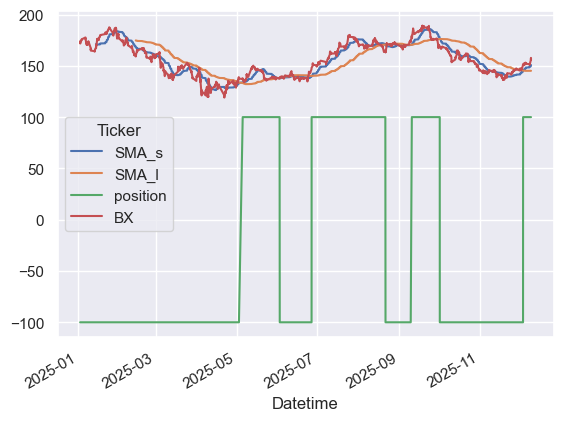

In [125]:

strategy('BX','2025-01-01','2025-12-10',20, 100)

In [130]:
return_diff=(df[['Strategy']].sum().apply(np.exp)-1)/(df[['Return_perc']].sum().apply(np.exp)-1)
risk_diff=df['Return_perc'].std()/df['Strategy'].std()
overall_score=np.add(risk_diff,return_diff)


In [131]:
risk_diff

np.float64(1.6980104712098816)